## Exchange Rate vs Travel Between US and UK
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

# Import API key
import config
from config import api_key

# Output File (CSV)
output_data_file = "output_data/quarter_data.csv"

In [2]:
# New Dependency! Use this to pretty print the JSON
# https://docs.python.org/3/library/pprint.html
from pprint import pprint

In [3]:
# The URL for the FRED API
base = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
q_dict = {'DEXUSUK':'US_UK_Forex_Rate'
          }

# Include start date, API key from config.py file and file type json
start_date = '2000-01-01'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2019-01-01'
e_dates = '&observation_end={}'.format(end_date)

api_key = '&api_key={}'.format(config.api_key)

ftype = '&file_type=json'
frequency = 'q'
freq = '&frequency={}'.format(frequency)
aggregation = 'avg'
agg = '&aggregation_method={}'.format(aggregation)

In [4]:
df = pd.DataFrame()
for code, name in q_dict.items():
    url = '{}{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq,agg)
    r = requests.get(url).json()['observations']
    df[name] = [i['value'] for i in r]
df.index = pd.to_datetime([i['date'] for i in r])
df.head()
#df.to_csv('output_data/general.csv')
len(df)

77

#### Check data types of values in API exchange rates

In [5]:
x1_axis = df.index.values

In [6]:
df.dtypes
cols = df.columns[df.dtypes.eq(object)]
cols
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df.dtypes

US_UK_Forex_Rate    float64
dtype: object

In [7]:
df.to_csv(output_data_file)

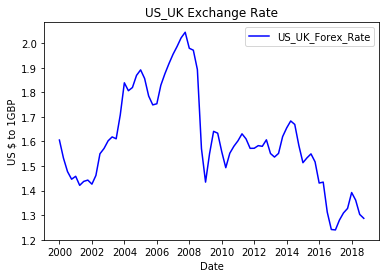

In [8]:
x1_axis = df.index.values

#plt.plot(x_axis, y_axis)
plt.plot(x1_axis, df["US_UK_Forex_Rate"],color="blue" )
plt.legend(loc="best")

plt.title(f"US_UK Exchange Rate")
plt.ylabel("US $ to 1GBP")
plt.xlabel("Date")

#plt.savefig
plt.savefig("US_UK Exchange Rate.png")
plt.show()

In [9]:
df.head()

,US_UK_Forex_Rate
2000-01-01,1.6055
2000-04-01,1.5320
2000-07-01,1.4773
2000-10-01,1.4462
2001-01-01,1.4581


In [10]:
df1 =df.reset_index()
df1.head()

,index,US_UK_Forex_Rate
0,2000-01-01,1.6055
1,2000-04-01,1.5320
2,2000-07-01,1.4773
3,2000-10-01,1.4462
4,2001-01-01,1.4581


In [11]:
df1.dtypes

index               datetime64[ns]
US_UK_Forex_Rate           float64
dtype: object

In [12]:
df1['year'] = df1['index'].dt.year 
df1['quarter'] = df1['index'].dt.month
df1.head()

,index,US_UK_Forex_Rate,year,quarter
0,2000-01-01,1.6055,2000,1
1,2000-04-01,1.5320,2000,4
2,2000-07-01,1.4773,2000,7
3,2000-10-01,1.4462,2000,10
4,2001-01-01,1.4581,2001,1


In [13]:
df1.quarter.replace(1,'January-March',inplace=True)
df1.quarter.replace(4,'April-June',inplace=True)
df1.quarter.replace(7,'July-September',inplace=True)
df1.quarter.replace(10,'October-December',inplace=True)


In [14]:
df1.head()

,index,US_UK_Forex_Rate,year,quarter
0,2000-01-01,1.6055,2000,January-March
1,2000-04-01,1.5320,2000,April-June
2,2000-07-01,1.4773,2000,July-September
3,2000-10-01,1.4462,2000,October-December
4,2001-01-01,1.4581,2001,January-March


In [15]:
df1.dtypes

index               datetime64[ns]
US_UK_Forex_Rate           float64
year                         int64
quarter                     object
dtype: object

In [16]:
df1 = df1.drop('index', 1)
df1.head()

,US_UK_Forex_Rate,year,quarter
0,1.6055,2000,January-March
1,1.5320,2000,April-June
2,1.4773,2000,July-September
3,1.4462,2000,October-December
4,1.4581,2001,January-March


In [17]:
# Data obtained from https://www.visitbritain.org/inbound-tourism-trends
Data = pd.read_csv('data/travel_data.csv')
Data.head()



,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,USA,1-3 nights,Air,Air,UK,Holiday,Male,25-34,Independent,0.405252,0.045388,0.810504,1
1,2002,January-March,USA,1-3 nights,Air,Air,UK,Holiday,Male,35-44,Independent,0.429082,0.000000,1.287250,1
2,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Male,16-24,Independent,0.375868,0.010148,0.375868,1
3,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Male,25-34,Independent,0.410749,0.036968,0.610258,2
4,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Male,35-44,Independent,0.529216,0.120605,0.928234,2


In [18]:
Data.dtypes

year               int64
quarter           object
market            object
dur_stay          object
mode              object
mode_detail       object
nationality       object
purpose           object
sex               object
age               object
package           object
Visits (000s)    float64
Spend (£m)       float64
Nights (000s)    float64
sample             int64
dtype: object

In [19]:
new_df = pd.merge(Data,df1, on=['year','quarter'])

In [20]:
new_df

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,Visits (000s),Spend (£m),Nights (000s),sample,US_UK_Forex_Rate
0,2002,January-March,USA,1-3 nights,Air,Air,UK,Holiday,Male,25-34,Independent,0.405252,0.045388,0.810504,1,1.4261
1,2002,January-March,USA,1-3 nights,Air,Air,UK,Holiday,Male,35-44,Independent,0.429082,0.000000,1.287250,1,1.4261
2,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Male,16-24,Independent,0.375868,0.010148,0.375868,1,1.4261
3,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Male,25-34,Independent,0.410749,0.036968,0.610258,2,1.4261
4,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Male,35-44,Independent,0.529216,0.120605,0.928234,2,1.4261
5,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Male,55-64,Independent,0.211240,0.065907,0.633720,1,1.4261
6,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Female,25-34,Independent,0.833334,0.025126,0.833334,2,1.4261
7,2002,January-March,USA,1-3 nights,Air,Air,UK,Miscellaneous,Female,35-44,Independent,0.199509,0.042296,0.199509,1,1.4261
8,2002,January-March,USA,1-3 nights,Air,Air,France,Holiday,Male,35-44,Independent,0.189365,0.021209,0.568095,1,1.4261
9,2002,January-March,USA,1-3 nights,Air,Air,Germany,Holiday,Male,25-34,Independent,0.159293,0.161205,0.477879,1,1.4261


In [21]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import os

In [22]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [23]:
db = client.ETL_DB

In [24]:
collection = db.etl_project_db

In [25]:
collection.insert_many(new_df.to_dict('records'))